In [1]:
import sys
sys.path.append('../')
from pychemkin import ChemSolver, chemkin, InputParser, ReactionCoeffs,BackwardCoeffs
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.integrate import solve_ivp, ode
x_init = np.ones(4)*1.e-10
T = 1000
chem = chemkin("../tests/test_xml/rxns_singlereversible.xml")
cs = ChemSolver(chem)
_,cs.kf,cs.kb = cs.chem._progress_rate_init(x_init,T)
cs.nu_diff_matrix = cs.chem.nu_prod-cs.chem.nu_react
print(solve_ivp(cs._ChemSolver__dy_dt, 
          t_span=(0, 6e-5), 
          y0=x_init, 
          t_eval=np.linspace(0,6e-5,20), method = 'Radau'))

print("Using scipy.integrate.ode")

r = ode(cs._ChemSolver__dy_dt).set_integrator('lsoda')
r.set_initial_value(x_init,0)
t1 = 6.0e-5
dt = 3.15789474e-06
while r.successful() and r.t <= t1:
    print(r.t+dt, r.integrate(r.t+dt))

Finished reading xml input file
  message: 'Required step size is less than spacing between numbers.'
     nfev: 1352
     njev: 36
      nlu: 274
      sol: None
   status: -1
  success: False
        t: array([  0.00000000e+00,   3.15789474e-06])
 t_events: None
        y: array([[  1.00000000e-10,   1.38997024e-10],
       [  1.00000000e-10,   1.38997024e-10],
       [  1.00000000e-10,   6.10029761e-11],
       [  1.00000000e-10,   6.10029761e-11]])
Using scipy.integrate.ode
3.15789474e-06 [  1.68923614e-10   1.68923614e-10   3.10763860e-11   3.10763860e-11]
6.31578948e-06 [  1.80149047e-10   1.80149047e-10   1.98509530e-11   1.98509530e-11]
9.47368422e-06 [  1.84242662e-10   1.84242662e-10   1.57573384e-11   1.57573384e-11]
1.263157896e-05 [  1.86098221e-10   1.86098221e-10   1.39017792e-11   1.39017792e-11]
1.57894737e-05 [  1.87038096e-10   1.87038096e-10   1.29619037e-11   1.29619037e-11]
1.894736844e-05 [  1.87529210e-10   1.87529210e-10   1.24707897e-11   1.24707897e-11]
2.210

In [3]:
from scipy.integrate import solve_ivp, ode
x_init = np.ones(4)*1.e-10
T = 1000
chem = chemkin("../tests/test_xml/rxns_singlereversible.xml")
cs = ChemSolver(chem)
_,cs.kf,cs.kb = cs.chem._progress_rate_init(x_init,T)
cs.nu_diff_matrix = cs.chem.nu_prod-cs.chem.nu_react
print(solve_ivp(cs._ChemSolver__dy_dt, 
          t_span=(0, 7e-5), 
          y0=x_init, 
          t_eval=np.linspace(0,7e-5,20), method = 'LSODA'))

print("Using scipy.integrate.ode")

r = ode(cs._ChemSolver__dy_dt).set_integrator('lsoda')
r.set_initial_value(x_init,0)
t1 = 7.0e-5
dt = 3.68421053e-06
while r.successful() and r.t <= t1:
    print(r.t+dt, r.integrate(r.t+dt))

Finished reading xml input file
  message: 'The solver successfully reached the interval end.'
     nfev: 44
     njev: 1
      nlu: 1
      sol: None
   status: 0
  success: True
        t: array([  0.00000000e+00,   3.68421053e-06,   7.36842105e-06,
         1.10526316e-05,   1.47368421e-05,   1.84210526e-05,
         2.21052632e-05,   2.57894737e-05,   2.94736842e-05,
         3.31578947e-05,   3.68421053e-05,   4.05263158e-05,
         4.42105263e-05,   4.78947368e-05,   5.15789474e-05,
         5.52631579e-05,   5.89473684e-05,   6.26315789e-05,
         6.63157895e-05,   7.00000000e-05])
 t_events: None
        y: array([[  1.00000000e-10,   1.46963082e-10,   1.84251428e-10,
          1.87352333e-10,   1.87836997e-10,   1.88003475e-10,
          1.88069885e-10,   1.88095959e-10,   1.88113270e-10,
          1.88122803e-10,   1.88127346e-10,   1.88129650e-10,
          1.88130882e-10,   1.88131525e-10,   1.88131854e-10,
          1.88132024e-10,   1.88132143e-10,   1.88132311e-10,


In [12]:
x_init = np.ones(4)*2.e-10
T = 1000
def get_equilibrium_conc(x_init, T):
    file_name = "../tests/test_xml/rxns_singlereversible.xml"
    input_ = InputParser(file_name)
    rc_list = [ReactionCoeffs(**params) for params in input_.rate_coeff_params]
    rc_list[0].set_params(T=T)
    kf = rc_list[0].k_forward()
    bc = BackwardCoeffs(input_.nu_react, input_.nu_prod,input_.species)
    kb = bc.backward_coeffs(np.array([kf]), T)[0]
    k_eq = kf/kb
    A = (1-k_eq)
    B = x_init[2]+x_init[3]+k_eq*(x_init[0]+x_init[1])
    C = x_init[2]*x_init[3]-k_eq*x_init[0]*x_init[1]
    deltax =  (-B+np.sqrt(B**2-4*A*C))/(2*A)
    return np.array([x_init[0]-deltax,x_init[1]-deltax,x_init[2]+deltax,x_init[3]+deltax])
    
equilibrium_vals = get_equilibrium_conc(x_init, T)
print(equilibrium_vals)

Finished reading xml input file
[  3.76264416e-10   3.76264416e-10   2.37355840e-11   2.37355840e-11]


Finished reading xml input file
[[ -10993.30897086  -10993.30897086  165608.25357918  165608.25357918]
 [ -10993.30897086  -10993.30897086  165608.25357918  165608.25357918]
 [  10993.30897086   10993.30897086 -165608.25357918 -165608.25357918]
 [  10993.30897086   10993.30897086 -165608.25357918 -165608.25357918]]
1000


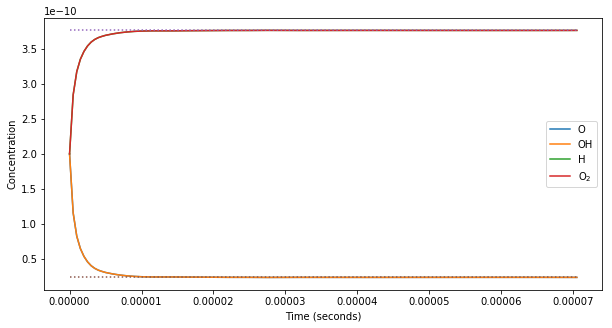

In [13]:
chem = chemkin("../tests/test_xml/rxns_singlereversible.xml")
# initial concentration
x_init = np.ones(4)*2.e-10
T = 1000
t_final = 7.e-5
t_step = 5.e-7
cs = ChemSolver(chem)
sols = cs.solve(x_init, T, t_final, t_step, algorithm = 'vode', method = 'bdf')
df_vode = sols.to_df()
def plot_demo(df):
    plt.figure(figsize = (10,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],np.ones_like(df['t'])*equilibrium_vals[0], linestyle = ':')
    plt.plot(df['t'],np.ones_like(df['t'])*equilibrium_vals[2], linestyle = ':')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_vode)
df_vode.tail(20)
print(cs._jac(0, np.array([3.77e-10, 3.77e-10, 2.26e-11, 2.26e-11])))
print(cs.T)

In [6]:
chem = chemkin("../tests/test_xml/rxns_singlereversible.xml")
# initial concentration
x_init = np.array([2,1,1,2])*1.e-10
T = 1000
cs = ChemSolver(chem)
cs.T = T
derivs = np.zeros(chem.nu_react.shape)
print(chem.nu_react)
x_init,kf, kb = chem._progress_rate_init(x_init, T)
print(kf)
print(kb)
for i in range(len(chem.nu_react)):
    prod1 = x_init**chem.nu_react
    masked_prod1 = np.ma.array(prod1, mask = False)
    masked_prod1[i] = True
    derivs[i] =chem.nu_react[i]*x_init[i]**(chem.nu_react[i]-1)*kf*np.product(masked_prod1, axis = 0)

    if np.any(chem.reversible):
        prod2 = x_init**chem.nu_prod
        masked_prod2 = np.ma.array(prod2, mask = False)
        masked_prod2[i] = True
        #print(chem.nu_prod[i]*x_init[i]**(chem.nu_prod[i]-1)*  kb * np.product(masked_prod2[:, chem.reversible], axis=0))
        #print(derivs[i,chem.reversible])
        derivs[i,chem.reversible] = derivs[i,chem.reversible] -chem.nu_prod[i]*x_init[i]**(chem.nu_prod[i]-1)*  kb * np.product(masked_prod2[:, chem.reversible], axis=0)

#print(cs._jac(0,x_init))
print(derivs)
jac = np.zeros((len(chem.species), len(chem.species)))
nu_diff_matrix = chem.nu_prod-chem.nu_react
for j in range(len(chem.species)):
    jac[:,j] = np.sum(derivs[j] * nu_diff_matrix, axis=1)
print(jac)

Finished reading xml input file
[[1]
 [1]
 [0]
 [0]]
[  2.91599707e+13]
[  7.32779883e+15]
[[    2915.9970745 ]
 [    5831.99414899]
 [-1465559.76618743]
 [ -732779.88309372]]
[[   -2915.9970745     -5831.99414899  1465559.76618743   732779.88309372]
 [   -2915.9970745     -5831.99414899  1465559.76618743   732779.88309372]
 [    2915.9970745      5831.99414899 -1465559.76618743  -732779.88309372]
 [    2915.9970745      5831.99414899 -1465559.76618743  -732779.88309372]]


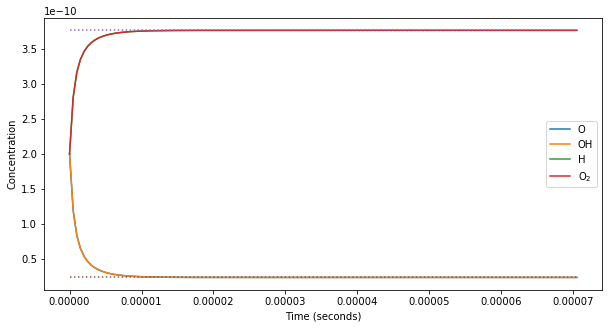

In [11]:
cs = ChemSolver(chem).solve(x_init, T, t_final, t_step, algorithm = 'dopri5')
df_dopri5 = cs.to_df()
plot_demo(df_dopri5)


,t,H-Concentration,O2-Concentration,O-Concentration,OH-Concentration,H-Reaction_rate,O2-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,T
137,0.000068,3.762668e-10,3.762668e-10,2.373320e-11,2.373320e-11,-8.829759e-10,-8.829759e-10,8.829759e-10,8.829759e-10,1000.0
138,0.000069,3.762668e-10,3.762668e-10,2.373322e-11,2.373322e-11,-8.750139e-10,-8.750139e-10,8.750139e-10,8.750139e-10,1000.0
139,0.000069,3.762668e-10,3.762668e-10,2.373324e-11,2.373324e-11,-8.670519e-10,-8.670519e-10,8.670519e-10,8.670519e-10,1000.0
140,0.000070,3.762667e-10,3.762667e-10,2.373326e-11,2.373326e-11,-8.590899e-10,-8.590899e-10,8.590899e-10,8.590899e-10,1000.0
141,0.000070,3.762667e-10,3.762667e-10,2.373328e-11,2.373328e-11,-8.511279e-10,-8.511279e-10,8.511279e-10,8.511279e-10,1000.0


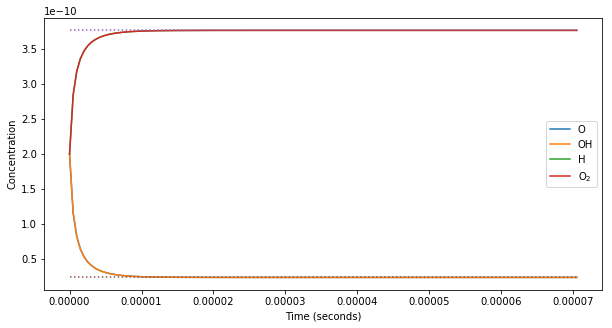

In [13]:
cs = ChemSolver(chem).solve(x_init, T, t_final, t_step, algorithm = 'lsoda', use_jac = True)
df_lsoda = cs.to_df()
plot_demo(df_lsoda)
df_lsoda.tail(5)

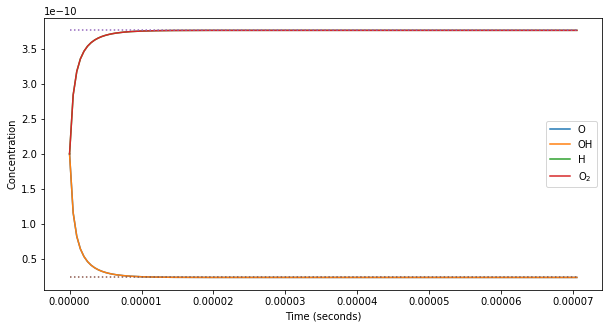

In [13]:
cs = ChemSolver(chem).solve(x_init, T, t_final, t_step, algorithm = 'dop853')
df_dop853 = cs.to_df()
plot_demo(df_dop853)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
3991,0.001996,4.910236e-11,1.366435e-11,4.258177e-12,1.621108e-10,2.596512e-10,3.094312e-10,4.483757e-13,1.333548e-12,-1.271185e-08,1.589866e-08,1.387133e-08,-6.452389e-09,8.558485e-09,-1.609239e-08,-7.720272e-10,-2.299822e-09,1000.0
3992,0.001996,4.910614e-11,1.366245e-11,4.254584e-12,1.621075e-10,2.596558e-10,3.094332e-10,4.479916e-13,1.332408e-12,-1.316822e-08,1.634451e-08,1.434885e-08,-6.450295e-09,8.543663e-09,-1.654916e-08,-7.713493e-10,-2.298010e-09,1000.0
3993,0.001997,4.910992e-11,1.366054e-11,4.250990e-12,1.621041e-10,2.596603e-10,3.094352e-10,4.476076e-13,1.331268e-12,-1.362449e-08,1.679028e-08,1.482626e-08,-6.448202e-09,8.528852e-09,-1.700583e-08,-7.706715e-10,-2.296198e-09,1000.0
3994,0.001997,4.911371e-11,1.365864e-11,4.247396e-12,1.621008e-10,2.596649e-10,3.094372e-10,4.472235e-13,1.330128e-12,-1.408066e-08,1.723595e-08,1.530355e-08,-6.446109e-09,8.514050e-09,-1.746239e-08,-7.699937e-10,-2.294386e-09,1000.0
3995,0.001998,4.911749e-11,1.365674e-11,4.243802e-12,1.620975e-10,2.596694e-10,3.094392e-10,4.468395e-13,1.328989e-12,-1.453674e-08,1.768153e-08,1.578072e-08,-6.444017e-09,8.499257e-09,-1.791886e-08,-7.693159e-10,-2.292573e-09,1000.0
3996,0.001998,4.912128e-11,1.365483e-11,4.240208e-12,1.620942e-10,2.596740e-10,3.094412e-10,4.464554e-13,1.327849e-12,-1.499271e-08,1.812702e-08,1.625777e-08,-6.441925e-09,8.484475e-09,-1.837523e-08,-7.686381e-10,-2.290760e-09,1000.0
3997,0.001999,4.912506e-11,1.365293e-11,4.236614e-12,1.620909e-10,2.596785e-10,3.094432e-10,4.460714e-13,1.326709e-12,-1.544858e-08,1.857242e-08,1.673469e-08,-6.439833e-09,8.469702e-09,-1.883150e-08,-7.679603e-10,-2.288947e-09,1000.0
3998,0.001999,4.912885e-11,1.365102e-11,4.233021e-12,1.620876e-10,2.596830e-10,3.094452e-10,4.456873e-13,1.325569e-12,-1.590435e-08,1.901774e-08,1.721150e-08,-6.437742e-09,8.454939e-09,-1.928767e-08,-7.672826e-10,-2.287133e-09,1000.0
3999,0.002000,4.911935e-11,1.366204e-11,4.243240e-12,1.620844e-10,2.596872e-10,3.094340e-10,4.453062e-13,1.324433e-12,-1.442273e-08,1.757847e-08,1.567529e-08,-6.450229e-09,8.492144e-09,-1.782139e-08,-7.667228e-10,-2.284838e-09,1000.0
4000,0.002000,4.910967e-11,1.367324e-11,4.253655e-12,1.620812e-10,2.596914e-10,3.094226e-10,4.449252e-13,1.323296e-12,-1.291210e-08,1.611103e-08,1.410886e-08,-6.462920e-09,8.530162e-09,-1.632633e-08,-7.661646e-10,-2.282536e-09,1000.0


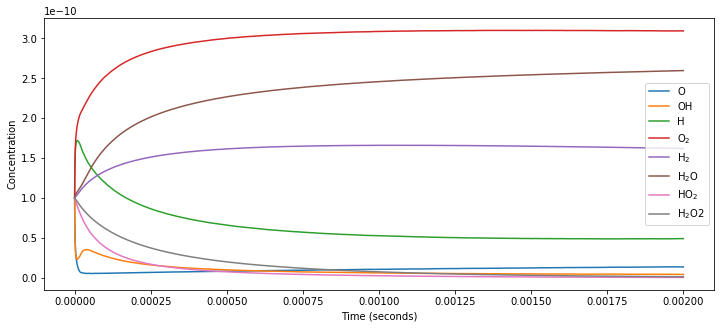

In [5]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
x_init = np.ones(8)*1.e-10
T = 1000
t_final = 2.e-3
t_step = 5.e-7
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'vode', method = 'bdf')
df_vode = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_vode)
df_vode.tail(10)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
3991,0.001996,4.896909e-11,1.376251e-11,4.357613e-12,1.621455e-10,2.596507e-10,3.093531e-10,4.420657e-13,1.319406e-12,1.859184e-09,1.768991e-09,-1.251920e-09,-6.580581e-09,8.925723e-09,-1.694163e-09,-7.569193e-10,-2.270314e-09,1000.0
3992,0.001996,4.896939e-11,1.376368e-11,4.357188e-12,1.621424e-10,2.596555e-10,3.093522e-10,4.415713e-13,1.317978e-12,1.856697e-09,1.774096e-09,-1.245582e-09,-6.582246e-09,8.922585e-09,-1.701638e-09,-7.560306e-10,-2.267881e-09,1000.0
3993,0.001997,4.896969e-11,1.376485e-11,4.356764e-12,1.621393e-10,2.596604e-10,3.093514e-10,4.410775e-13,1.316553e-12,1.854221e-09,1.779186e-09,-1.239260e-09,-6.583909e-09,8.919450e-09,-1.709096e-09,-7.551430e-10,-2.265450e-09,1000.0
3994,0.001997,4.896999e-11,1.376602e-11,4.356341e-12,1.621362e-10,2.596652e-10,3.093505e-10,4.405842e-13,1.315129e-12,1.851757e-09,1.784262e-09,-1.232953e-09,-6.585571e-09,8.916319e-09,-1.716535e-09,-7.542567e-10,-2.263022e-09,1000.0
3995,0.001998,4.897030e-11,1.376720e-11,4.355918e-12,1.621331e-10,2.596700e-10,3.093496e-10,4.400916e-13,1.313706e-12,1.849304e-09,1.789323e-09,-1.226662e-09,-6.587230e-09,8.913192e-09,-1.723958e-09,-7.533717e-10,-2.260597e-09,1000.0
3996,0.001998,4.897061e-11,1.376837e-11,4.355495e-12,1.621301e-10,2.596748e-10,3.093488e-10,4.395996e-13,1.312285e-12,1.846862e-09,1.794369e-09,-1.220386e-09,-6.588888e-09,8.910068e-09,-1.731363e-09,-7.524878e-10,-2.258175e-09,1000.0
3997,0.001999,4.897092e-11,1.376954e-11,4.355073e-12,1.621270e-10,2.596796e-10,3.093479e-10,4.391082e-13,1.310866e-12,1.844432e-09,1.799400e-09,-1.214125e-09,-6.590544e-09,8.906948e-09,-1.738751e-09,-7.516051e-10,-2.255755e-09,1000.0
3998,0.001999,4.897123e-11,1.377071e-11,4.354652e-12,1.621239e-10,2.596844e-10,3.093470e-10,4.386174e-13,1.309449e-12,1.842014e-09,1.804416e-09,-1.207880e-09,-6.592198e-09,8.903832e-09,-1.746121e-09,-7.507237e-10,-2.253339e-09,1000.0
3999,0.002000,4.897155e-11,1.377188e-11,4.354231e-12,1.621208e-10,2.596892e-10,3.093462e-10,4.381272e-13,1.308033e-12,1.839607e-09,1.809418e-09,-1.201651e-09,-6.593850e-09,8.900719e-09,-1.753474e-09,-7.498435e-10,-2.250925e-09,1000.0
4000,0.002000,4.897186e-11,1.377305e-11,4.353810e-12,1.621177e-10,2.596940e-10,3.093453e-10,4.376376e-13,1.306618e-12,1.837211e-09,1.814404e-09,-1.195437e-09,-6.595500e-09,8.897609e-09,-1.760810e-09,-7.489645e-10,-2.248514e-09,1000.0


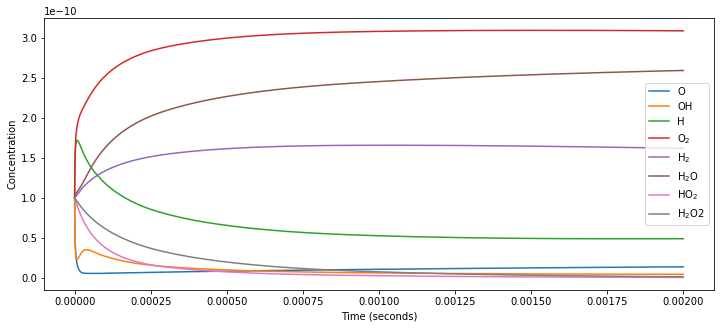

In [10]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
x_init = np.ones(8)*1.e-10
T = 1000
t_final = 2.e-3
t_step = 5.e-7
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'lsoda')
df_lsoda = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_lsoda)
df_lsoda.tail(10)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
3991,0.001996,4.895009e-11,1.377629e-11,4.346077e-12,1.621450e-10,2.596874e-10,3.093570e-10,4.372849e-13,1.300862e-12,1.350242e-09,2.283646e-09,-6.464312e-10,-6.599807e-09,8.861917e-09,-2.259221e-09,-7.526607e-10,-2.237684e-09,1000.0
3992,0.001996,4.895077e-11,1.377743e-11,4.345754e-12,1.621417e-10,2.596918e-10,3.093559e-10,4.369088e-13,1.299743e-12,1.352864e-09,2.282959e-09,-6.458741e-10,-6.601129e-09,8.859444e-09,-2.260442e-09,-7.520240e-10,-2.235799e-09,1000.0
3993,0.001997,4.895145e-11,1.377857e-11,4.345431e-12,1.621384e-10,2.596962e-10,3.093547e-10,4.365329e-13,1.298626e-12,1.355485e-09,2.282272e-09,-6.453175e-10,-6.602449e-09,8.856974e-09,-2.261662e-09,-7.513878e-10,-2.233915e-09,1000.0
3994,0.001997,4.895213e-11,1.377971e-11,4.345109e-12,1.621351e-10,2.597007e-10,3.093536e-10,4.361574e-13,1.297509e-12,1.358103e-09,2.281586e-09,-6.447612e-10,-6.603768e-09,8.854505e-09,-2.262880e-09,-7.507522e-10,-2.232032e-09,1000.0
3995,0.001998,4.895281e-11,1.378085e-11,4.344787e-12,1.621318e-10,2.597051e-10,3.093525e-10,4.357822e-13,1.296394e-12,1.360719e-09,2.280899e-09,-6.442055e-10,-6.605086e-09,8.852039e-09,-2.264098e-09,-7.501171e-10,-2.230151e-09,1000.0
3996,0.001998,4.895349e-11,1.378199e-11,4.344465e-12,1.621285e-10,2.597095e-10,3.093513e-10,4.354073e-13,1.295279e-12,1.363334e-09,2.280213e-09,-6.436501e-10,-6.606403e-09,8.849575e-09,-2.265314e-09,-7.494826e-10,-2.228272e-09,1000.0
3997,0.001999,4.895417e-11,1.378313e-11,4.344143e-12,1.621252e-10,2.597139e-10,3.093502e-10,4.350327e-13,1.294165e-12,1.365946e-09,2.279528e-09,-6.430953e-10,-6.607718e-09,8.847112e-09,-2.266529e-09,-7.488486e-10,-2.226395e-09,1000.0
3998,0.001999,4.895485e-11,1.378427e-11,4.343822e-12,1.621219e-10,2.597184e-10,3.093491e-10,4.346584e-13,1.293053e-12,1.368557e-09,2.278842e-09,-6.425408e-10,-6.609033e-09,8.844652e-09,-2.267743e-09,-7.482152e-10,-2.224519e-09,1000.0
3999,0.002000,4.895554e-11,1.378541e-11,4.343501e-12,1.621186e-10,2.597228e-10,3.093479e-10,4.342845e-13,1.291941e-12,1.371165e-09,2.278157e-09,-6.419868e-10,-6.610347e-09,8.842193e-09,-2.268955e-09,-7.475823e-10,-2.222645e-09,1000.0
4000,0.002000,4.895622e-11,1.378655e-11,4.343180e-12,1.621153e-10,2.597272e-10,3.093468e-10,4.339108e-13,1.290830e-12,1.373771e-09,2.277472e-09,-6.414333e-10,-6.611659e-09,8.839737e-09,-2.270166e-09,-7.469499e-10,-2.220772e-09,1000.0


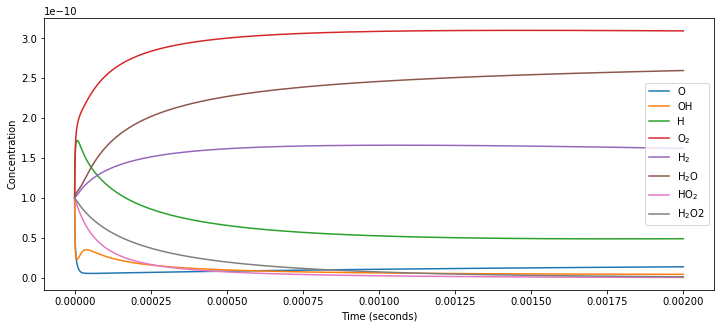

In [2]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
x_init = np.ones(8)*1.e-10
T = 1000
t_final = 2.e-3
t_step = 5.e-7
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'dopri5')
df_dopri5 = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_dopri5)
df_dopri5.tail(10)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
3991,0.001996,4.895008e-11,1.377628e-11,4.346077e-12,1.621451e-10,2.596873e-10,3.093570e-10,4.372853e-13,1.300863e-12,1.350241e-09,2.283645e-09,-6.464313e-10,-6.599807e-09,8.861918e-09,-2.259220e-09,-7.526611e-10,-2.237685e-09,1000.0
3992,0.001996,4.895075e-11,1.377742e-11,4.345754e-12,1.621418e-10,2.596918e-10,3.093559e-10,4.369091e-13,1.299744e-12,1.352864e-09,2.282958e-09,-6.458741e-10,-6.601128e-09,8.859446e-09,-2.260441e-09,-7.520243e-10,-2.235800e-09,1000.0
3993,0.001997,4.895143e-11,1.377856e-11,4.345431e-12,1.621385e-10,2.596962e-10,3.093547e-10,4.365333e-13,1.298627e-12,1.355484e-09,2.282272e-09,-6.453175e-10,-6.602448e-09,8.856975e-09,-2.261661e-09,-7.513882e-10,-2.233916e-09,1000.0
3994,0.001997,4.895211e-11,1.377971e-11,4.345109e-12,1.621352e-10,2.597006e-10,3.093536e-10,4.361577e-13,1.297510e-12,1.358102e-09,2.281585e-09,-6.447613e-10,-6.603768e-09,8.854507e-09,-2.262879e-09,-7.507525e-10,-2.232033e-09,1000.0
3995,0.001998,4.895279e-11,1.378085e-11,4.344787e-12,1.621319e-10,2.597051e-10,3.093525e-10,4.357825e-13,1.296395e-12,1.360719e-09,2.280899e-09,-6.442055e-10,-6.605085e-09,8.852040e-09,-2.264097e-09,-7.501175e-10,-2.230153e-09,1000.0
3996,0.001998,4.895347e-11,1.378199e-11,4.344465e-12,1.621286e-10,2.597095e-10,3.093513e-10,4.354076e-13,1.295280e-12,1.363333e-09,2.280213e-09,-6.436502e-10,-6.606402e-09,8.849576e-09,-2.265313e-09,-7.494830e-10,-2.228274e-09,1000.0
3997,0.001999,4.895415e-11,1.378313e-11,4.344143e-12,1.621253e-10,2.597139e-10,3.093502e-10,4.350330e-13,1.294167e-12,1.365945e-09,2.279527e-09,-6.430953e-10,-6.607718e-09,8.847113e-09,-2.266528e-09,-7.488490e-10,-2.226396e-09,1000.0
3998,0.001999,4.895483e-11,1.378427e-11,4.343821e-12,1.621220e-10,2.597183e-10,3.093491e-10,4.346588e-13,1.293054e-12,1.368556e-09,2.278842e-09,-6.425408e-10,-6.609033e-09,8.844653e-09,-2.267741e-09,-7.482155e-10,-2.224520e-09,1000.0
3999,0.002000,4.895552e-11,1.378541e-11,4.343500e-12,1.621186e-10,2.597228e-10,3.093479e-10,4.342848e-13,1.291942e-12,1.371164e-09,2.278156e-09,-6.419868e-10,-6.610346e-09,8.842195e-09,-2.268954e-09,-7.475827e-10,-2.222646e-09,1000.0
4000,0.002000,4.895621e-11,1.378654e-11,4.343179e-12,1.621153e-10,2.597272e-10,3.093468e-10,4.339112e-13,1.290831e-12,1.373770e-09,2.277471e-09,-6.414333e-10,-6.611659e-09,8.839738e-09,-2.270165e-09,-7.469503e-10,-2.220773e-09,1000.0


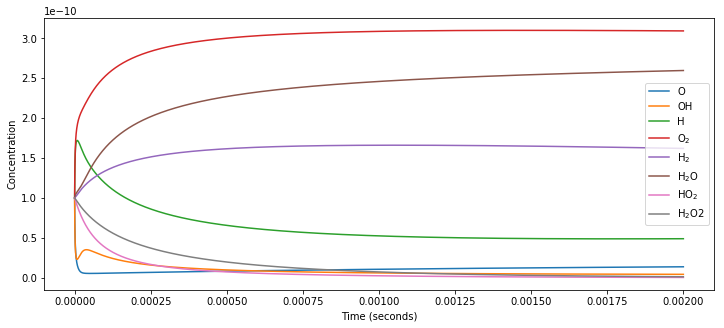

In [8]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
x_init = np.ones(8)*1.e-10
T = 1000
t_final = 2.e-3
t_step = 5.e-7
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'dop853')
df_dop853 = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_dop853)
df_dop853.tail(10)